# 1

### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### loading dataset

In [2]:
fd = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 11\\Fraud_check.csv")

In [3]:
fd

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### using Label Encoder

In [4]:
label_encoder = preprocessing.LabelEncoder()
fd['Urban'] = label_encoder.fit_transform(fd['Urban']) 
fd["Undergrad"] = label_encoder.fit_transform(fd["Undergrad"])
fd["Marital.Status"] = label_encoder.fit_transform(fd["Marital.Status"])

In [5]:
x = fd.iloc[:,0:5]
y = fd["Urban"]

In [6]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [7]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [8]:
fd['Urban'].unique()

array([1, 0])

In [9]:
fd["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [10]:
colnames = list(fd.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

### Using Train_Test_Split method

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting Decision Tree

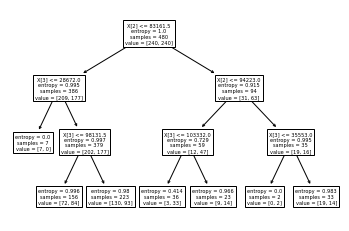

In [13]:
tree.plot_tree(model);

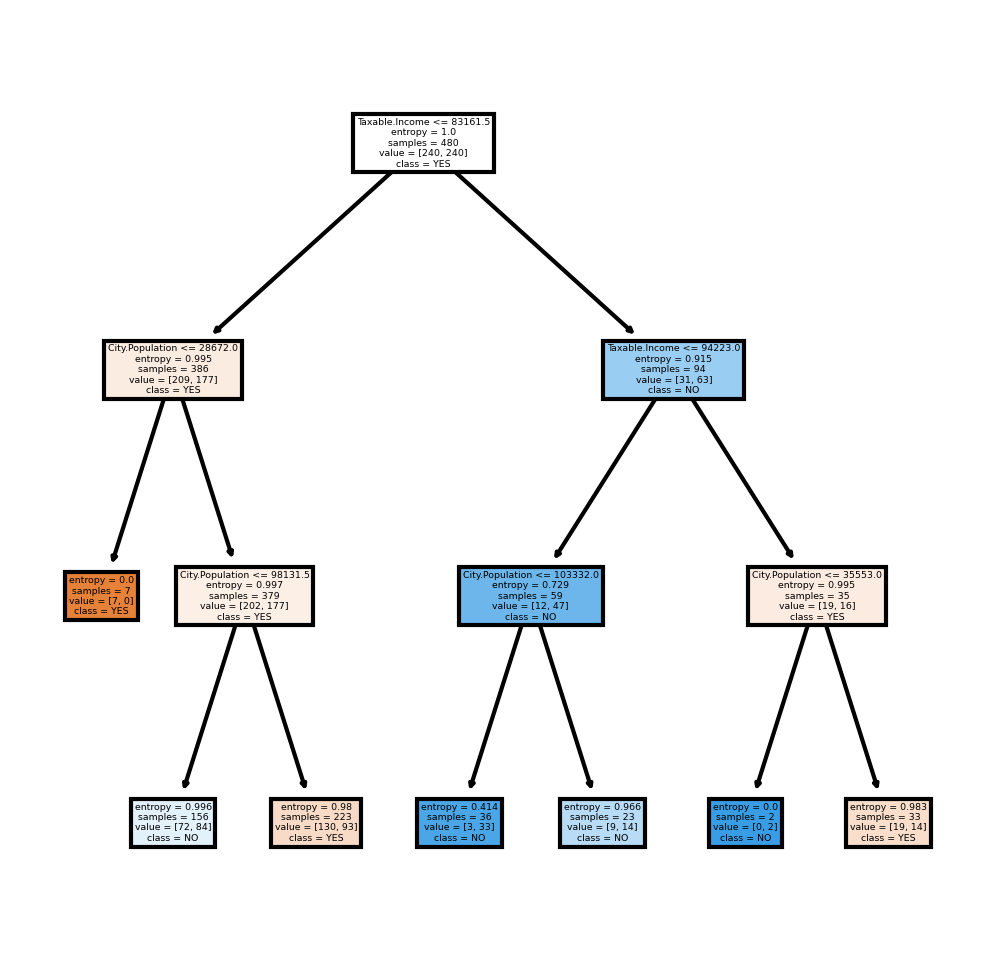

In [14]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience']
cn=['YES', 'NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    64
1    56
dtype: int64

In [16]:
preds

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [17]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban,,
0,33,25
1,31,31


### Estimating Accuracy

In [18]:
np.mean(preds==y_test)

0.5333333333333333

### Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
array = fd.values

In [21]:
x = array[:,0:5]
y = array[:,5]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [23]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
model.score(x_test,  y_test)

-1.0008165765030115

# 2

### Loading Company Dataset

In [25]:
cd = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 11\\Company_Data.csv")

In [26]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Applying Label Encoder

In [31]:
label_encoder = preprocessing.LabelEncoder()
cd['ShelveLoc']= label_encoder.fit_transform(cd['ShelveLoc']) 
cd["Urban"] = label_encoder.fit_transform(cd["Urban"])
cd["US"] = label_encoder.fit_transform(cd["US"])

### Using Urban  as Y variable

In [28]:
x=cd.iloc[:,0:9]
y=cd['Urban']

In [29]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0,42,17
1,11.22,111,48,16,260,83,1,65,10
2,10.06,113,35,10,269,80,2,59,12
3,7.40,117,100,4,466,97,2,55,14
4,4.15,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14
396,6.14,139,23,3,37,120,2,55,11
397,7.41,162,26,12,368,159,2,40,18
398,5.94,100,79,7,284,95,0,50,12


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32

In [32]:
cd["Urban"].unique()

array([1, 0], dtype=int64)

In [33]:
cd["Urban"].value_counts()

1    282
0    118
Name: Urban, dtype: int64

### Train_Test_Split

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [35]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Decision Tree for Urban as Dependent Variable

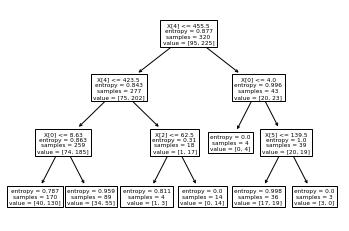

In [36]:
tree.plot_tree(model1);

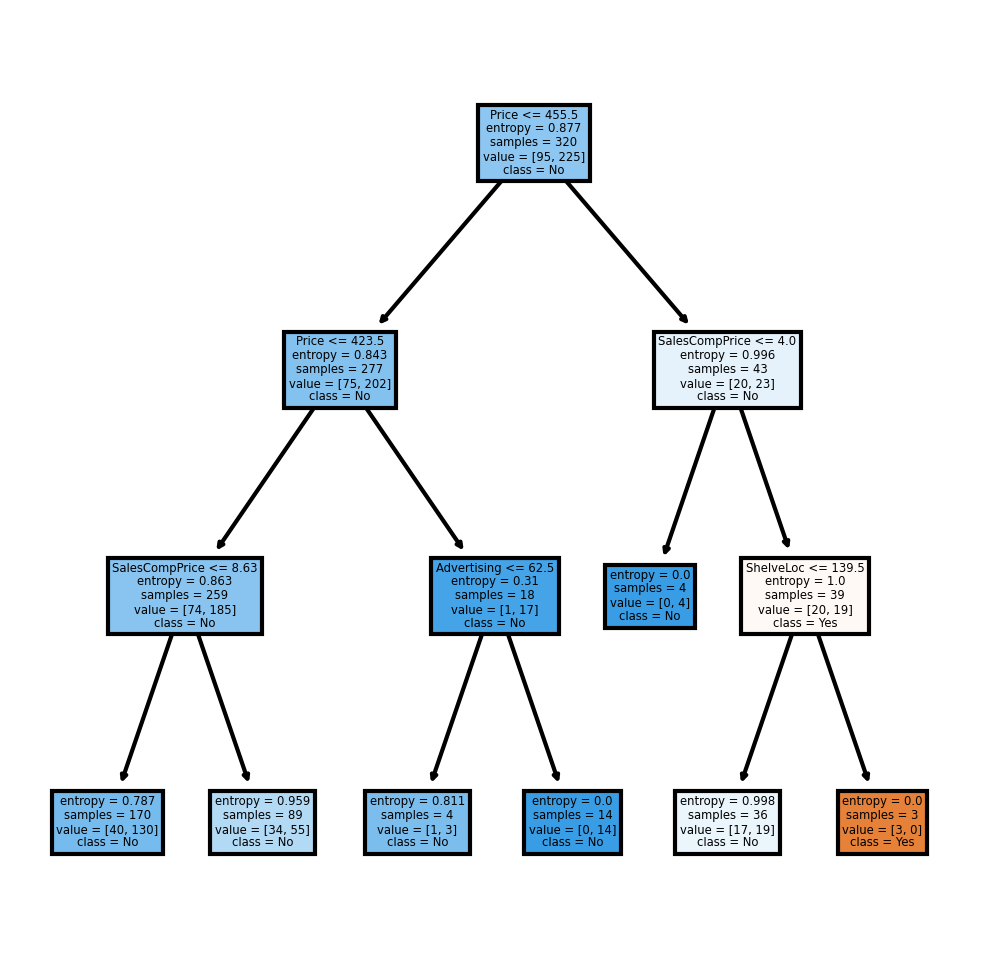

In [37]:
fn=['Sales' 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education']
cn=['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
preds = model1.predict(x_test)
pd.Series(preds).value_counts()

1    80
dtype: int64

In [39]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
pd.crosstab(y_test, preds)

col_0,1
Urban,
0,23
1,57


### Calculating Accuracy for our Dependent variable Urban

In [41]:
np.mean(preds == y_test)

0.7125

### Using US as Y variable

In [42]:
x=cd.iloc[:,0:9]
y=cd['US']

In [43]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0,42,17
1,11.22,111,48,16,260,83,1,65,10
2,10.06,113,35,10,269,80,2,59,12
3,7.40,117,100,4,466,97,2,55,14
4,4.15,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14
396,6.14,139,23,3,37,120,2,55,11
397,7.41,162,26,12,368,159,2,40,18
398,5.94,100,79,7,284,95,0,50,12


In [44]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int64

In [45]:
cd["US"].unique()

array([1, 0], dtype=int64)

In [46]:
cd["US"].value_counts()

1    258
0    142
Name: US, dtype: int64

### Train_Test_Split

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [48]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Decision Tree for US as Dependent Variable

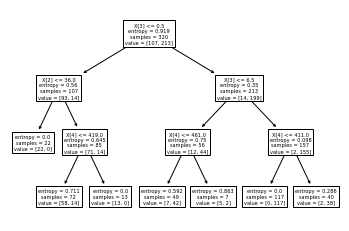

In [49]:
tree.plot_tree(model2);

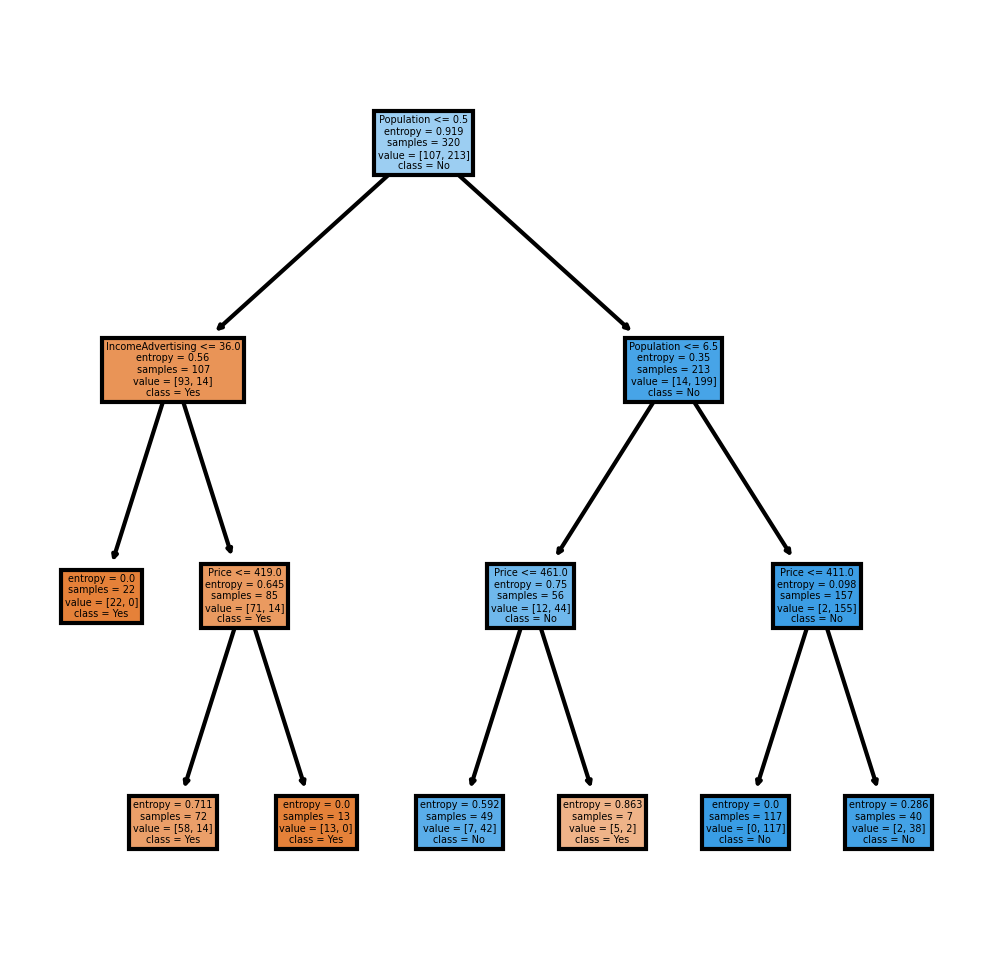

In [50]:
fn=['Sales', 'CompPrice', 'Income' 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education']
cn=['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [51]:
preds = model2.predict(x_test) 
pd.Series(preds).value_counts() 

1    42
0    38
dtype: int64

### Calculating Accuracy for our dependent variable US

In [52]:
np.mean(preds == y_test)

0.8875

### Claculating Accuracy by Using Gini's technique

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [54]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
pred=model2.predict(x_test)
np.mean(preds == y_test)

0.8875